In [30]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.graph_objs as go

import tensorflow.compat.v1 as tf

%matplotlib notebook
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [31]:
tf.disable_eager_execution()
tf.disable_v2_behavior()
tf.reset_default_graph()

In [32]:
df = pd.read_csv("BTC-Train.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008.0
1,2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992.0
2,2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000.0
3,2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984.0
4,2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,510199008.0


In [33]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1710,2021-09-07,52660.480469,52853.765625,43285.207031,46811.128906,46811.128906,6.521006e+10
1711,2021-09-08,46827.761719,47334.054688,44561.394531,46091.390625,46091.390625,4.900776e+10
1712,2021-09-09,45774.742188,47261.949219,45669.738281,46391.421875,46391.421875,3.867266e+10
1713,2021-09-10,46396.664063,47031.742188,44344.484375,44883.910156,44883.910156,3.915467e+10
1714,2021-09-11,44869.816406,45922.839844,44855.558594,45743.746094,45743.746094,3.702297e+10


In [34]:
df.shape

(1715, 7)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1715 non-null   object 
 1   Open       1711 non-null   float64
 2   High       1711 non-null   float64
 3   Low        1711 non-null   float64
 4   Close      1711 non-null   float64
 5   Adj Close  1711 non-null   float64
 6   Volume     1711 non-null   float64
dtypes: float64(6), object(1)
memory usage: 93.9+ KB


In [36]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [37]:
corr = df.corr()
corr

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999310,0.998633,0.998316,0.998316,0.722868
High,0.999310,1.000000,0.998545,0.999264,0.999264,0.726409
Low,0.998633,0.998545,1.000000,0.999115,0.999115,0.713810
Close,0.998316,0.999264,0.999115,1.000000,1.000000,0.720884
Adj Close,0.998316,0.999264,0.999115,1.000000,1.000000,0.720884
Volume,0.722868,0.726409,0.713810,0.720884,0.720884,1.000000


In [38]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1.711000e+03
mean,12995.829364,13367.666552,12589.589238,13020.890749,13020.890749,1.996782e+10
std,14215.112278,14651.619844,13707.812173,14233.216786,14233.216786,2.135635e+10
min,775.177979,823.307007,755.755981,777.757019,777.757019,6.085170e+07
25%,5077.713867,5282.096680,4987.065674,5093.062745,5093.062745,4.299460e+09
50%,8229.840820,8374.160156,8010.511719,8228.783203,8228.783203,1.460163e+10
75%,11405.894043,11696.753418,11153.544922,11407.112793,11407.112793,3.015689e+10
max,63523.753906,64863.097656,62208.964844,63503.457031,63503.457031,3.509679e+11


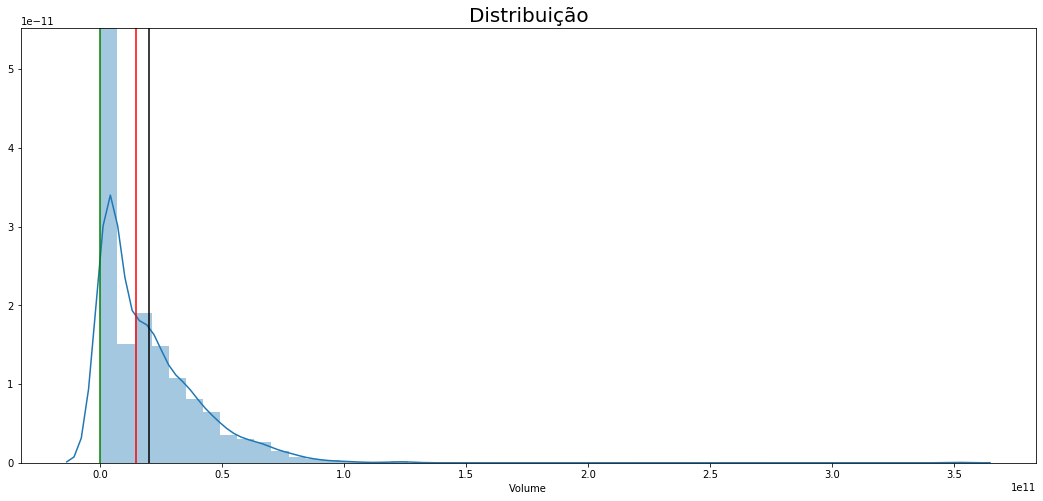

In [39]:
plt.figure(figsize=(18.2, 8))

ax = sns.distplot(df['Volume']);
plt.title("Distribuição", fontsize=20)
plt.axvline(df['Volume'].mean(), color='k')
plt.axvline(df['Volume'].median(), color='r')
plt.axvline(df['Volume'].mode()[0], color='g');

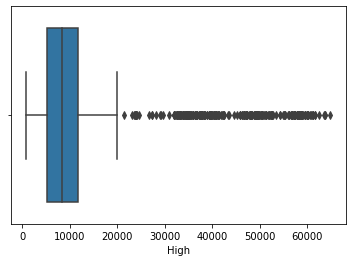

In [40]:
sns.boxplot(df["High"])

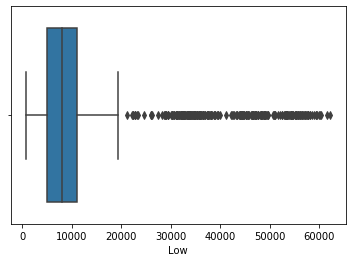

In [41]:
sns.boxplot(df["Low"])

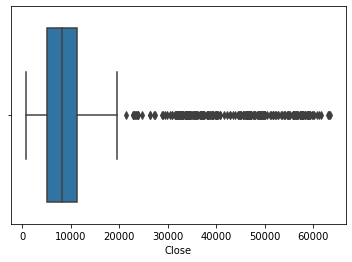

In [42]:
sns.boxplot(df["Close"])

(6.5, -0.5)

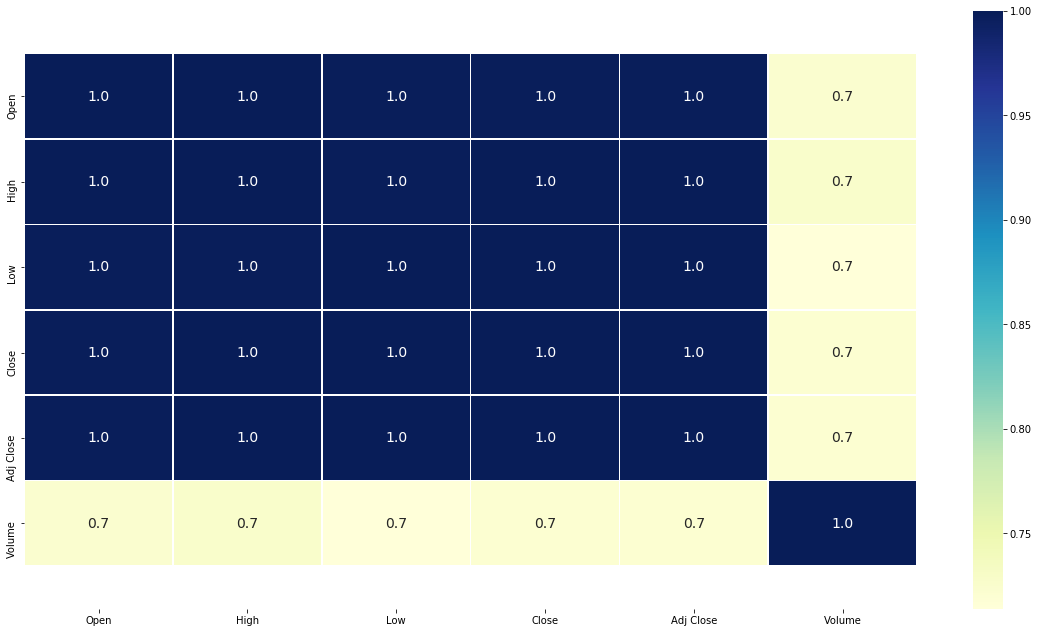

In [43]:
plt.figure(figsize=(20,11))

ax = sns.heatmap(df.corr(), annot=True, cmap='YlGnBu', linewidths=.5, annot_kws={'size':14} ,fmt=".1f")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

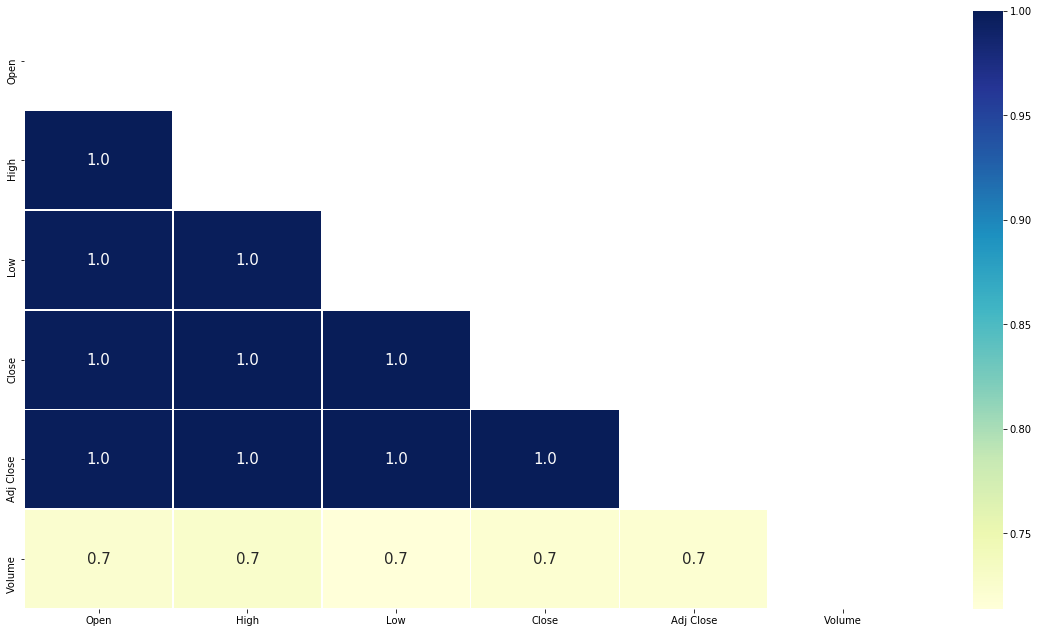

In [44]:
plt.figure(figsize=(20,11))

mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, annot = True, cmap="YlGnBu", linewidths=.5, annot_kws={'size':15} ,fmt=".1f")
plt.show()

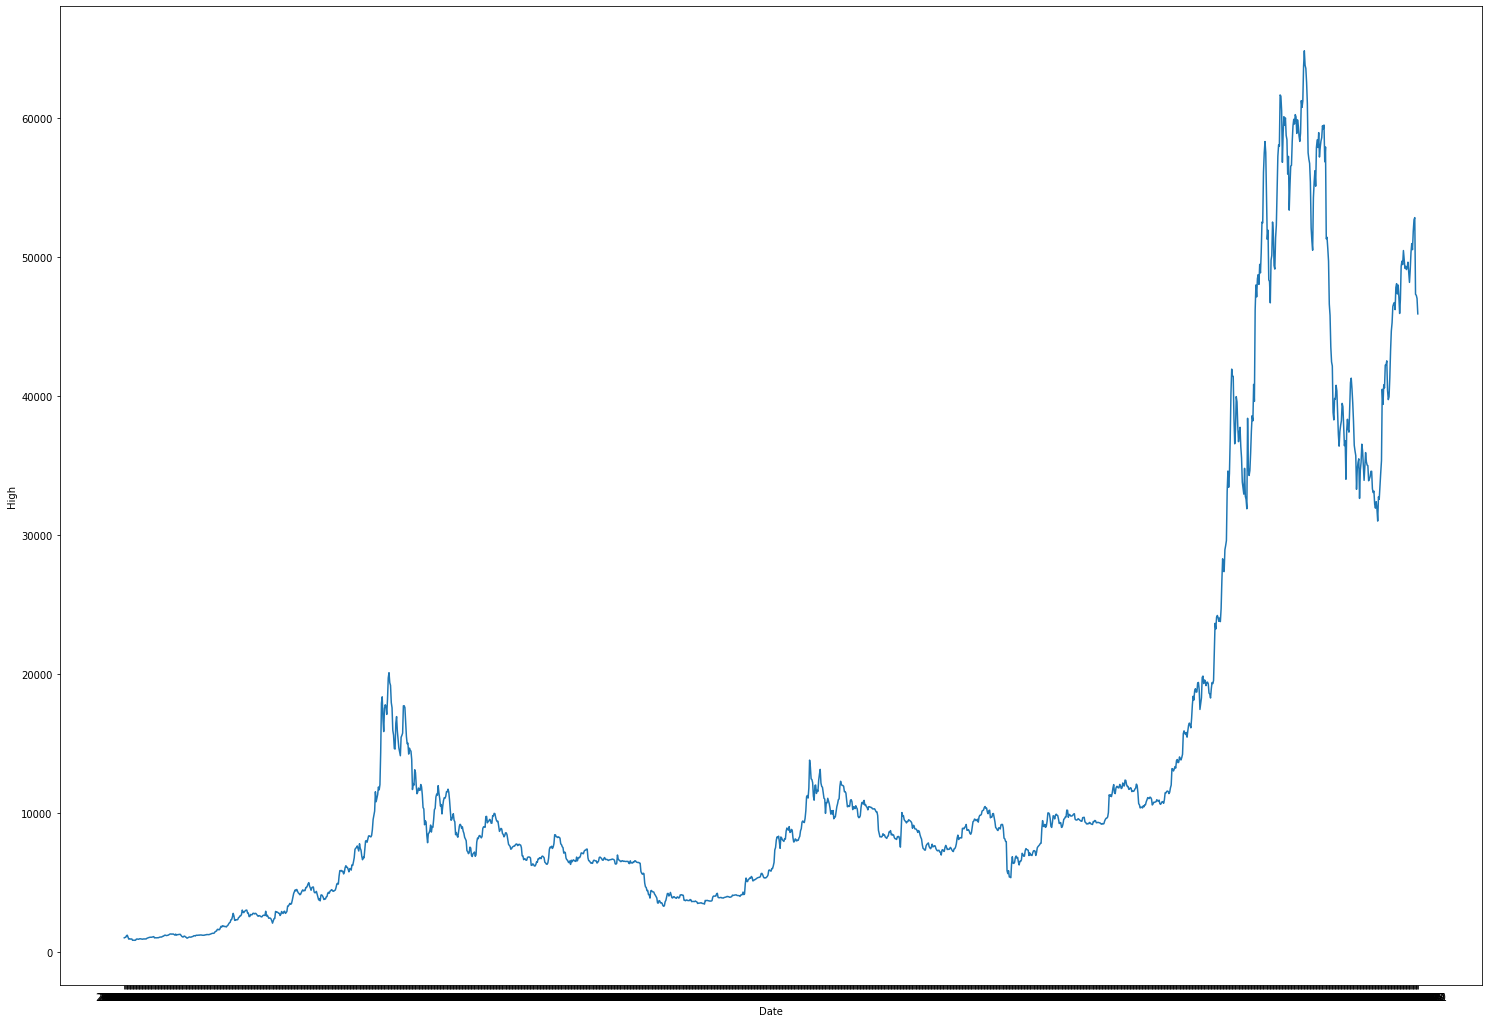

In [45]:
plt.figure(figsize=(25.5, 18))

ax = sns.lineplot(x = "Date", y="High", data = df)

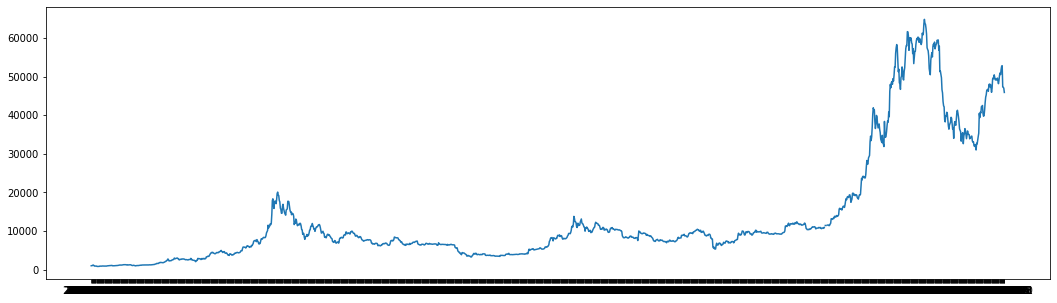

In [46]:
plt.figure(figsize=(18,5))

plt.plot(df["Date"], df["High"])

# Pré - processamento

In [47]:
df = df.dropna()
df = df.iloc[:,1].values

In [48]:
period = 30
predict_future = 1

In [49]:
x = df[0:(len(df) - (len(df) % period))]
x_batches = x.reshape(-1, period, 1)

In [50]:
y = df[1:(len(df) - (len(df) % period)) + predict_future]
y_batches = y.reshape(-1, period, 1)

In [51]:
X_teste = df[-(period + predict_future):]
X_teste = X_teste[:period]
X_teste = X_teste.reshape(-1, period, 1)

y_teste = df[-(period):]
y_teste = y_teste.reshape(-1, period, 1)

# Rede Neural

In [52]:
entradas = 1
neuronios_oculta = 100
neuronios_saida = 1

In [53]:
xph = tf.placeholder(tf.float32, [None, period, entradas])
yph = tf.placeholder(tf.float32, [None, period, neuronios_saida])

n_layers = 4
layers = [tf.keras.layers.LSTMCell(units=neuronios_oculta, activation=tf.nn.relu)
          for layer in range(n_layers)]

multi_layer_cell = tf.keras.layers.StackedRNNCells(layers)
saida_rnn, _ = tf.nn.dynamic_rnn(multi_layer_cell, xph, dtype = tf.float32)
stacked_rnn_outputs = tf.reshape(saida_rnn, [-1, neuronios_oculta]) 
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, neuronios_saida)
outputs = tf.reshape(stacked_outputs, [-1, period, neuronios_saida])

erro = tf.reduce_mean(tf.square(outputs - yph))
otimizador = tf.train.AdamOptimizer(learning_rate = 0.001)
treinamento = otimizador.minimize(erro)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoca in range(2000):
        _, custo = sess.run([treinamento, erro], feed_dict = {xph: x_batches, yph: y_batches})
        if epoca % 100 == 0:
            print(epoca + 1, ' erro: ', custo)
    
    previsoes = sess.run(outputs, feed_dict = {xph: X_teste})

1  erro:  387991680.0
101  erro:  189495620.0
201  erro:  239283890.0
301  erro:  181821940.0
401  erro:  234517800.0
501  erro:  171759980.0
601  erro:  146981980.0
701  erro:  113413880.0
801  erro:  133915224.0
901  erro:  172689040.0
1001  erro:  126919304.0
1101  erro:  108272210.0
1201  erro:  99701630.0
1301  erro:  87312280.0
1401  erro:  91533770.0
1501  erro:  85461530.0
1601  erro:  82476240.0
1701  erro:  77080540.0
1801  erro:  74741250.0
1901  erro:  74215070.0


In [54]:
y_teste.shape
y_teste2 = np.ravel(y_teste)
y_teste2

array([44439.691406, 47810.6875  , 47096.667969, 47019.960938,
       45936.457031, 44686.75    , 44741.882813, 46723.121094,
       49327.074219, 48869.105469, 49291.675781, 49562.347656,
       47727.257813, 49002.640625, 46894.554688, 49072.585938,
       48911.25    , 48834.851563, 47024.339844, 47099.773438,
       48807.847656, 49288.25    , 50009.324219, 49937.859375,
       51769.003906, 52660.480469, 46827.761719, 45774.742188,
       46396.664063, 44869.816406])

In [55]:
previsoes2 = np.ravel(previsoes)
previsoes2

array([  141.66869,  1306.4146 ,  3148.8125 ,  5275.6216 ,  8856.121  ,
       13599.333  , 18555.438  , 24686.898  , 31889.604  , 39609.01   ,
       45857.832  , 52598.863  , 53071.473  , 44383.91   , 46530.324  ,
       50276.52   , 50512.26   , 48969.53   , 47129.367  , 47371.57   ,
       47572.58   , 47817.043  , 48114.484  , 48455.688  , 48847.406  ,
       49228.664  , 49640.516  , 50105.723  , 50621.39   , 51192.348  ],
      dtype=float32)

In [56]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_teste2, previsoes2)
mae

12327.478491677897

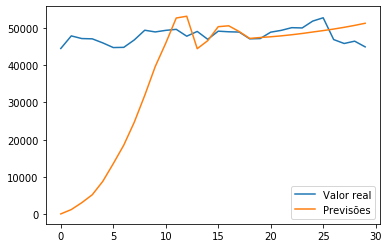

In [57]:
plt.plot(y_teste2, markersize = 10, label = 'Valor real')
plt.plot(previsoes2, label = 'Previsões')
plt.legend()

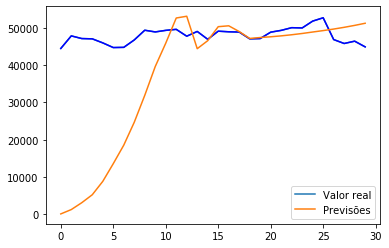

In [58]:
plt.plot(y_teste2, label = 'Valor real')
plt.plot(y_teste2, markersize = 20, color = 'blue')
plt.plot(previsoes2, label = 'Previsões')
plt.legend()